# Caching Strategies Exploration
15212-CourseWork-2 from Weicheng Ao

In [1]:
from cache import Memory, CyclicCache, LRUCache, RandomCache
import random
import matplotlib.pyplot as plt

# memcount = 0
# lrucount = 0
# cycliccount = 0
# rdmcount = 0

## Experiments
We use a range of test cases in this main part, in order to show the performance and relationship between the different caching strategies under various conditions.

In [2]:
# We define the main test process here.
def process():
    global memcount,cycliccount,rdmcount,lrucount
    mem = Memory()
    lru = LRUCache()
    cyclic = CyclicCache()
    rdm = RandomCache()
    for datum in test_data:
        mem.lookup(datum)
    print("Memory memory Hits:", mem.get_hit_count())
    memcount = mem.get_hit_count()
    for datum in test_data:
        lru.lookup(datum)
    print("LRU memory Hits:", lru.get_hit_count())
    lrucount = lru.get_hit_count()
    for datum in test_data:
        cyclic.lookup(datum)
    print("Cyclic memory Hits:", cyclic.get_hit_count())
    cycliccount = cyclic.get_hit_count()
    for datum in test_data:
        rdm.lookup(datum)
    print("Random memory Hits:", rdm.get_hit_count())
    rdmcount = rdm.get_hit_count()

<h4>1. Basic Test Cases: Ordered/Unordered Data Points with no duplicate value contained (Every value in the Test Case is unique).</h4>

In [3]:
test_data = []
# Ordered Unique Data Generation, from 0 to 999.
print("Ordered Unique Data Generation")
for i in range(0,1000):
    test_data.append(i)

process()

# Unordered Unique Data Generation, from 0 to 999.
import random
random.shuffle(test_data)

print("Unordered Unique Data Generation")
process()


Ordered Unique Data Generation
Memory memory Hits: 1000
LRU memory Hits: 1000
Cyclic memory Hits: 1000
Random memory Hits: 1000
Unordered Unique Data Generation
Memory memory Hits: 1000
LRU memory Hits: 1000
Cyclic memory Hits: 1000
Random memory Hits: 1000


In [4]:
# Generate Unique Test Data according to the cache size N.
# For example: If N=4, the number of the test data will be 4, and this
#will be repeated 100 times of the same test set of data.
# This time I assumed the cache_size of three implementations same.

mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()

print("Cache Size Assumed:", rdm.cache_size)
test_data = []
temp = lru.cache_size
for i in range(0, lru.cache_size):
    test_data.append(random.randint(temp-lru.cache_size, temp))
    temp = temp + lru.cache_size + 1
print("Unique Data Set Generated:",test_data,"*100")
for i in range(0, 100):
    for j in range(0,temp):
        test_data.append(test_data[j])

import random
random.shuffle(test_data)

process()

Cache Size Assumed: 4
Unique Data Set Generated: [2, 5, 12, 19] *100
Memory memory Hits: 2404
LRU memory Hits: 4
Cyclic memory Hits: 4
Random memory Hits: 4


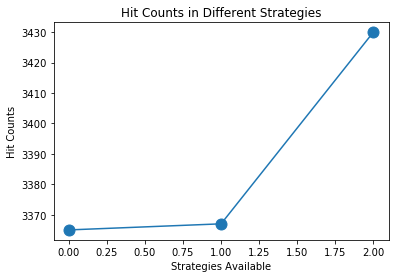

In [9]:
plt.title("Hit Counts in Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Strategies Available')
plt.plot([lrucount,cycliccount,rdmcount], label='Hit Counts', marker='o',markersize='11')

<p>Case Note:</p>
<p>For these Basic Test Cases above, we can see that they have the same times of memory accesses, this is because the data is unique and the number of data points is not exceeded the cache size, so that every data needs to be cached. Once the cached value is found, it needs not to access memory. Hence in these cases they behave in the same way.</p>

<h4>2. The number of unique data points is larger than the cache size.</h4>
<p>For example: if the cache size is 4, then the number of unique data points will be larger than 4.</p>

In [6]:
# Test Data Generation
# We generated 5 unique data points and appended these values 100 times to a list called test_data.
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()

# I used a range of the number of unique data points, in this case, from 5 to 14 unique values.
for k in range(1,11): 
    print("Cache Size Assumed:", rdm.cache_size)
    test_data = []
    temp = lru.cache_size
    for i in range(0, lru.cache_size + k):
        # This code snippet in this for loop is for generating unique values.
        test_data.append(random.randint(temp-lru.cache_size, temp))
        temp = temp + lru.cache_size + 1
    print("Unique Data Set Generated:",test_data,"*100")
    for i in range(0, 100):
        for j in range(0,temp+k):
            test_data.append(test_data[j])
    process()
    # print(len(test_data))

Cache Size Assumed: 4
Unique Data Set Generated: [0, 9, 11, 19, 20] *100
Memory memory Hits: 3005
LRU memory Hits: 3005
Cyclic memory Hits: 3005
Random memory Hits: 1186
Cache Size Assumed: 4
Unique Data Set Generated: [1, 9, 14, 16, 24, 25] *100
Memory memory Hits: 3606
LRU memory Hits: 3606
Cyclic memory Hits: 3606
Random memory Hits: 2231
Cache Size Assumed: 4
Unique Data Set Generated: [2, 8, 11, 15, 20, 25, 30] *100
Memory memory Hits: 4207
LRU memory Hits: 4207
Cyclic memory Hits: 4207
Random memory Hits: 3140
Cache Size Assumed: 4
Unique Data Set Generated: [1, 8, 11, 15, 20, 28, 34, 38] *100
Memory memory Hits: 4808
LRU memory Hits: 4808
Cyclic memory Hits: 4808
Random memory Hits: 3941
Cache Size Assumed: 4
Unique Data Set Generated: [1, 7, 14, 19, 20, 29, 31, 37, 44] *100
Memory memory Hits: 5409
LRU memory Hits: 5409
Cyclic memory Hits: 5409
Random memory Hits: 4753
Cache Size Assumed: 4
Unique Data Set Generated: [2, 7, 11, 15, 24, 26, 31, 36, 44, 48] *100
Memory memory Hit

<p>Case Note:</p>
<p>As you can see above, LRU and Cyclic strategies are performed in a same way, as the time of every data point used is only once. For the LRU strategy, it needs to write to cache every time after the fifth value (in the case of the cache size is 4) encountered, but it loses the first value added which also needs memory access if the next value is actually the last value just lost. For the Cyclic strategy, it will be the same as the next value encountered is the last value lost, that is bad in terms of memory accessing.</p>
<p>Interestingly, the Random strategy behaves very well in the first case, it only accessed the memory about one third (1/3) of the other two strategies. I think this is because the order of value accessing which is random accessing, takes a big advantage and is not restricted to the accessing order.</p>
<p>However, when the data set becomes large, the advantage of the Random strategy is reduced sharply first and then gradually diminished as shown in the graph.</p>

<h4>3. New value added just after a cached value used (in LRU case, it is read.) and After this, the Data Points between the second and the new added value are repeated several times.</h4>
<p>For example: if the cache size is 4, then the data set is like [0,1,2,3,0,4,1,2,3,0,4,1,2,3,0,4,...] (the part of repeatition is '1,2,3,0,4' in this case.) or more data points available, I mean that I intentionally repeat the cached value just before a new value comes, this means I want to explore the performances in case that LRU functionality is used, but I do not know the other two yet.</p>

In [7]:
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()

# I used a range of the number of unique data points, in this case, from 5 to 14 repeated set of values.
print("Cache Size Selected:", rdm.cache_size)

for k in range(80,100):
    test_data = []
    for i in range(0,rdm.cache_size):
        test_data.append(i)
    test_data.append(test_data[0])
    test_data.append(i+1)
    for j in range(1,k):
        for i in range(1,rdm.cache_size+2):
            test_data.append(test_data[i])
    process()

print(test_data)

Cache Size Selected: 4
Memory memory Hits: 401
LRU memory Hits: 400
Cyclic memory Hits: 201
Random memory Hits: 161
Memory memory Hits: 406
LRU memory Hits: 405
Cyclic memory Hits: 205
Random memory Hits: 165
Memory memory Hits: 411
LRU memory Hits: 410
Cyclic memory Hits: 206
Random memory Hits: 170
Memory memory Hits: 416
LRU memory Hits: 415
Cyclic memory Hits: 210
Random memory Hits: 177
Memory memory Hits: 421
LRU memory Hits: 420
Cyclic memory Hits: 211
Random memory Hits: 173
Memory memory Hits: 426
LRU memory Hits: 425
Cyclic memory Hits: 215
Random memory Hits: 163
Memory memory Hits: 431
LRU memory Hits: 430
Cyclic memory Hits: 216
Random memory Hits: 174
Memory memory Hits: 436
LRU memory Hits: 435
Cyclic memory Hits: 220
Random memory Hits: 184
Memory memory Hits: 441
LRU memory Hits: 440
Cyclic memory Hits: 221
Random memory Hits: 189
Memory memory Hits: 446
LRU memory Hits: 445
Cyclic memory Hits: 225
Random memory Hits: 180
Memory memory Hits: 451
LRU memory Hits: 450
Cy

In [8]:
# test_data = [1,2,3,1,5,1,6,7,8,1,9,2,3,1]

test_data = []
for i in range(0,9999):
    test_data.append(random.randint(0, 5))

process()

Memory memory Hits: 9999
LRU memory Hits: 3365
Cyclic memory Hits: 3367
Random memory Hits: 3430


## Conclusions
Both implementations seem to be doing the same thing.